In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Things to do:
* Clean the data
* Explore the data (you need to include at least two visualizations)

## Importando la data

In [2]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_3/Data/diabetes (1).csv'
data_diabetes=pd.read_csv(archivo)
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Revisando la data en busca de NaN

In [3]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


no hay presencia de valores NaN, por lo que se revisará en busqueda de valores cero que pueden significar contradicciones en la data

In [4]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


aquí nos damos cuenta que existen datos de personas con glucosa 0, insulina 0, presion arterial 0 y BMI 0, lo que significa en error, nadie puede tener estas caracteristicas con valor 0, por ende hay que limpiar estos valores, caracteristica por caracteristica.
El orden a seguir será:
1. Glucosa
2. presion arterial
3. BMI
4. pregnancies > 14

In [5]:
#1 
data_diabetes.loc[data_diabetes['Glucose']==0, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Se eliminarán estos datos debido a que es dificil determinar y aproximar el nivel de glucosa de un paciente dado sus pares

In [6]:
drop_glucose=data_diabetes.loc[data_diabetes['Glucose']==0, :]
df_limpio1=data_diabetes.drop(drop_glucose.index)
df_limpio1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
#2
df_limpio1.loc[df_limpio1['BloodPressure']==0, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


Una persona no puede tener 0 de presion arterial, a menos que haya fallecido, por lo que se borraran estos datos

In [8]:
drop_bloodpressure=df_limpio1.loc[df_limpio1['BloodPressure']==0, :]
df_limpio2=df_limpio1.drop(drop_bloodpressure.index)

In [9]:
#3 
drop_bmi=df_limpio2.loc[df_limpio2['BMI']==0,:]
df_limpio3=df_limpio2.drop(drop_bmi.index)
len(df_limpio3)


724

In [10]:
#4
drop_pregnancies=df_limpio3.loc[df_limpio3['Pregnancies']>=17,:]
df_limpio4=df_limpio3.drop(drop_pregnancies.index)
len(df_limpio4)

723

In [11]:
723/768

0.94140625

In [12]:
df_limpio4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.847856,121.825726,72.401107,21.416321,84.453665,32.455463,0.474292,33.331950,0.343015
std,3.329392,30.733193,12.388432,15.726792,117.092366,6.886553,0.332301,11.762559,0.475045
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,141.500000,80.000000,33.000000,131.000000,36.600000,0.626500,41.000000,1.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ya con la data bastante limpia y manejable, lo que nos quedo fue de que de la totalidad de datos, solo un 94% es util paraa realizar interpretaciones más precisas. 
para esto se realizará una agrupación por edad y el promedio de su nivel de glucosa e insulina 

In [13]:
data=df_limpio4.groupby('Age')[['Glucose','Insulin']].mean()
databmi=df_limpio4.groupby('BMI')[['Glucose','Insulin','BloodPressure']].count()

<BarContainer object of 245 artists>

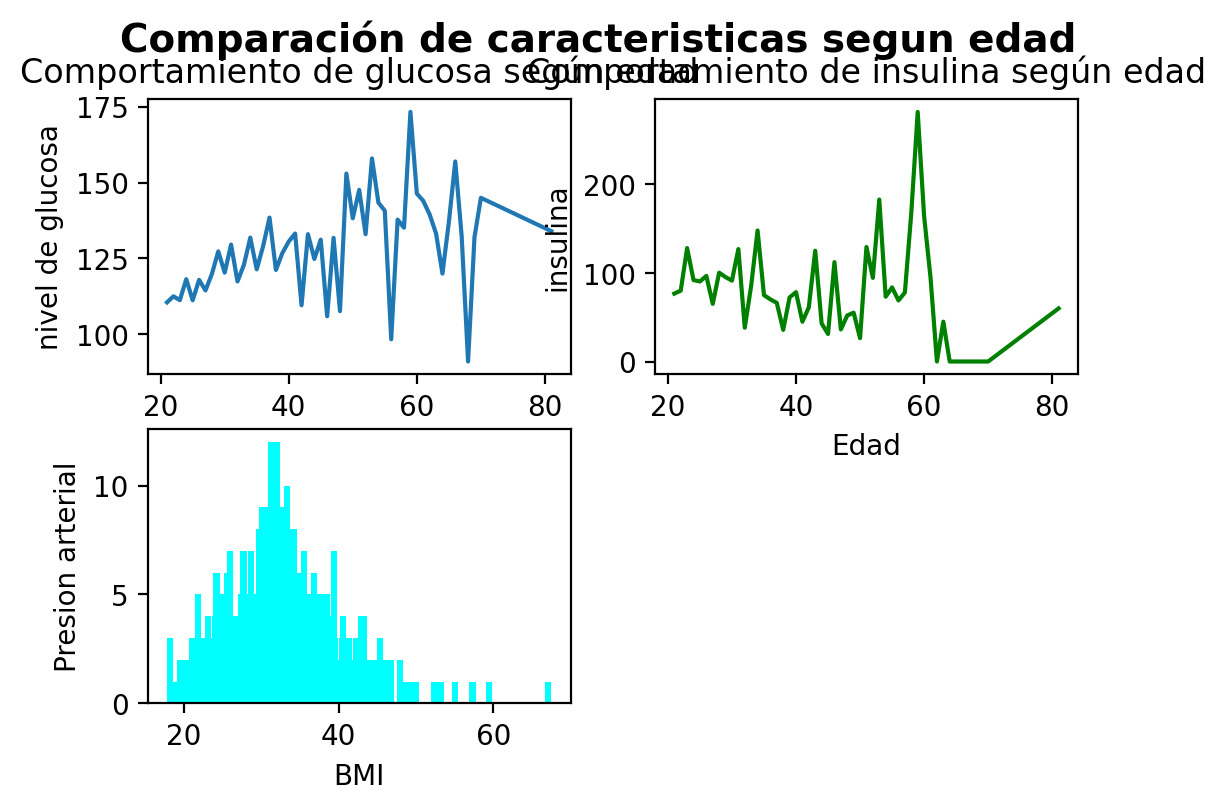

In [14]:
fig = plt.figure(dpi=200)
fig.suptitle("Comparación de caracteristicas segun edad", fontsize=14, fontweight="bold")
ax = fig.add_subplot(2,2,1)
ax.set_title("Comportamiento de glucosa según edad")
ax.set_xlabel('Edad')
ax.set_ylabel("nivel de glucosa")
ax.plot(data.index,data['Glucose'])

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Comportamiento de insulina según edad")
ax2.set_xlabel("Edad")
ax2.set_ylabel("insulina")
ax2.plot(data.index,data['Insulin'],color='green')

ax3=fig.add_subplot(2,2,3)
ax3.set_xlabel("BMI")
ax3.set_ylabel("Presion arterial")
ax3.bar(databmi.index,databmi['BloodPressure'],color='cyan')


## Haciendo KNN


Cargando las librerias

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Cargando los valores al modelo

In [75]:
df_limpio4['Outcome'].value_counts()

0    475
1    248
Name: Outcome, dtype: int64

In [100]:
X = df_limpio4.drop(columns=['Outcome']) # Separación de las características
y = df_limpio4['Outcome'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.35,
                                                    random_state=13)

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,

creando la matriz de confusion

In [103]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test,predictions)
cm.ravel()

array([154,  16,  54,  30])

In [104]:
tn, fp, fn, tp = cm.ravel()

In [105]:
print(f'la cantidad de verdaderos positivos es: {tp}\n la cantidad de verdaderos negativos es: {tn}\n la cantidad de falsos positivos es: {fp}\n la cantidad de falsos negativos es: {fn} ')

la cantidad de verdaderos positivos es: 30
 la cantidad de verdaderos negativos es: 154
 la cantidad de falsos positivos es: 16
 la cantidad de falsos negativos es: 54 


In [106]:
sensitivity = tp/ (tp + fn)
specificity = tn / (tn + fp)
precision=tp/(tp+fp)
type_one_error = 1 - specificity
type_two_error = 1 - sensitivity
print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))
print('Precisión: {:.3f}'.format(precision))
print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
print('Type 2 Error Rate: {:.3f}'.format(type_two_error))
print('Accuracy:',(tp+tn)/(fp+fn+tp+tn))

Sensitivity: 0.357
Specificity: 0.906
Precisión: 0.652
Type 1 Error Rate: 0.094
Type 2 Error Rate: 0.643
Accuracy: 0.7244094488188977


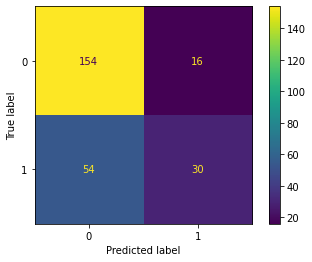

In [107]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [98]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

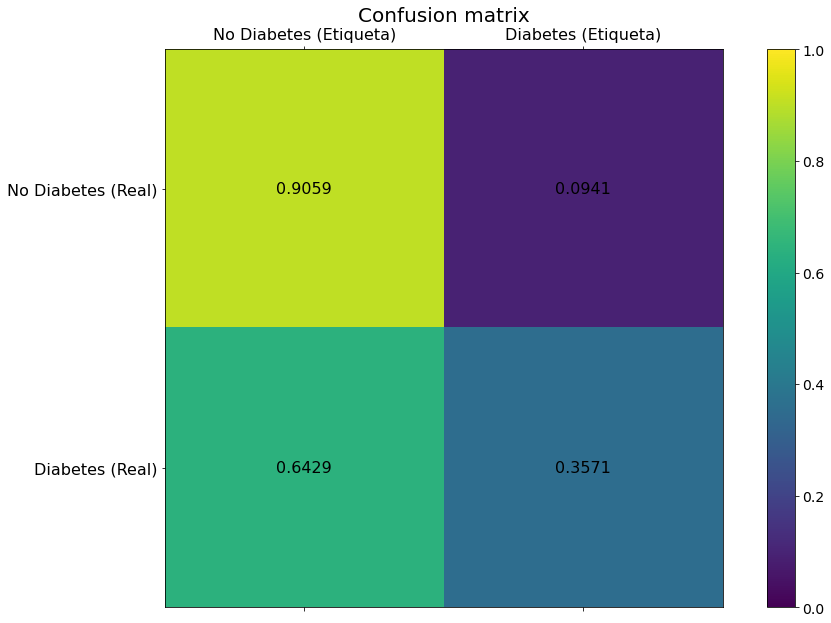

In [108]:
plotCMa(cm,['No Diabetes','Diabetes'])

---
Otros tipos de gráficos

Gráfico de torta

Ejercicio:

    1. Cargue la información de dicho archivo en un dataframe pandas.
    2. Con la información extraída, genere un **histograma** de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar.
    3. Ordene las notas y genere **un gráfico** (el que ud estime conveniente) de las notas ordenadas de menor a mayor.
    4. Genere **dos gráficos de torta** en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.

In [15]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_3/Data/notas-genero.xlsx'
data_ejercicio=pd.read_excel(archivo)
data_ejercicio

,Nombre,Nota,Genero
0,SEBASTI√ÅN ISRAEL,79,M
1,DANIEL ANTONIO,67,M
2,CRISTIAN ALBERTO,78,M
3,MAR√çA GABRIELA,54,F
4,JOS√â ANTONIO,79,M
5,BRAYAN ANDR√âS,75,M
6,TOM√ÅS FERNANDO,68,M
7,CHRISTIAN GABRIEL,76,M
8,LUIS FELIPE,78,M
9,OSCAR IGNACIO,57,M


1. Generando el histograma y estandarizando la muestra

In [16]:
from numpy.random import randn,rand
z=(data_ejercicio['Nota']-70)/14.71
print(z)


0     0.611829
1    -0.203943
2     0.543848
3    -1.087695
4     0.611829
5     0.339905
6    -0.135962
7     0.407886
8     0.543848
9    -0.883753
10   -3.670972
11   -0.135962
12    0.339905
13    0.203943
14   -0.543848
15   -0.271924
16    0.135962
17   -0.135962
18    1.019714
19    1.087695
20    0.679810
21    1.019714
22   -0.475867
23   -1.087695
24    1.087695
Name: Nota, dtype: float64


In [17]:
data_ejercicio.describe()

,Nota
count,25.00000
mean,70.00000
std,14.71677
min,16.00000
25%,66.00000
50%,73.00000
75%,79.00000
max,86.00000


Creando el histograma

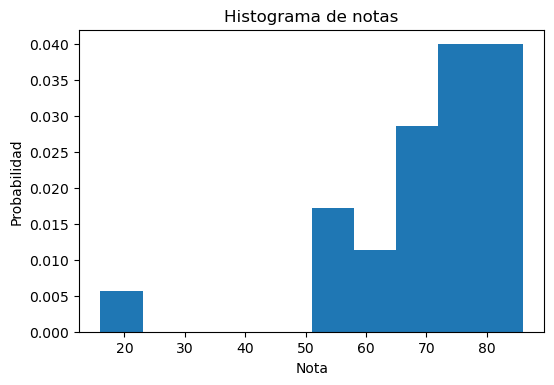

In [18]:
num_bins = 10
fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1,1,1)
ax1.hist(data_ejercicio['Nota'], num_bins, density=True)
ax1.set_xlabel("Nota")
ax1.set_ylabel("Probabilidad")
ax1.set_title("Histograma de notas")


plt.show()

Gráfico de notas

Agrupando las notas por cantidad

In [19]:
graf_notas=data_ejercicio.groupby('Nota')['Nota'].count()

Text(0.5, 1.0, 'Cantidad de notas')

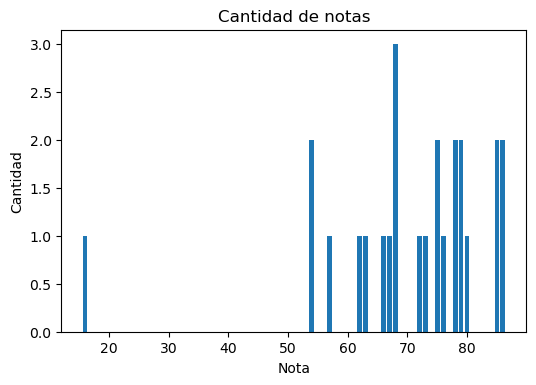

In [20]:
fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1,1,1)
ax1.bar(graf_notas.index, graf_notas.values)
ax1.set_xlabel("Nota")
ax1.set_ylabel("Cantidad")
ax1.set_title("Cantidad de notas")

In [21]:
filtro1=data_ejercicio.loc[data_ejercicio['Nota']>60,:]
aprobados=filtro1.groupby('Genero')[['Nota']].count()

In [22]:
aprobados

,Nota
Genero,
F,3
M,18


In [23]:
filtro2=data_ejercicio.loc[data_ejercicio['Nota']<=60,:]
Reprobados=filtro2.groupby('Genero')['Genero'].count()

ValueError: x must be 1D

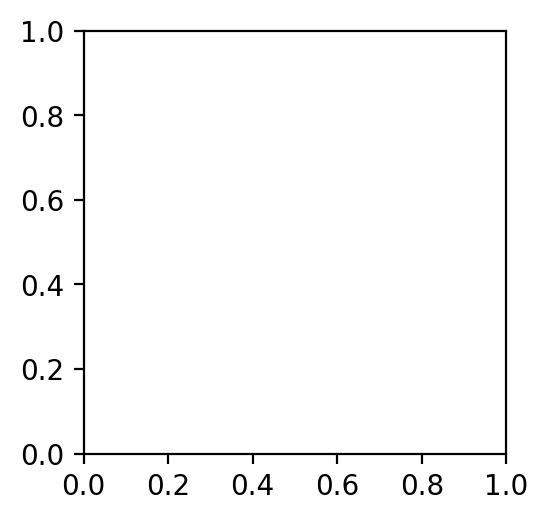

In [24]:
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(1,2,1)
ax1.pie(aprobados.values,labels=aprobados.index,autopct="%.2f%%")
ax1.set_title("Porcentaje de aprobados por genero")

ax2=fig.add_subplot(1,2,2)
ax2.pie(Reprobados.values,labels=Reprobados.index,autopct="%.2f%%")
ax2.set_title("Porcentaje de reprobados por genero")


---
Ejercicio
importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Cargando datos

In [ ]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_3/Data/drug200.csv'
data_drogas=pd.read_csv(archivo)

inspeccionando la data en busqueda de NaN

In [ ]:
data_drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Revisando los tipos de datos existentes

In [ ]:
data_drogas.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
data_drogas.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data_drogas['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
data_drogas['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
BP=data_drogas['BP'].value_counts()


77

In [ ]:
data_drogas['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
Drugs=data_drogas['Drug'].value_counts()
Drugs.index

Index(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], dtype='object')

Dado que no existen valores nulos o vacios, se procede a crear gráficas para poder comparar algunos datos
1. la primera que muestre las distintas categorias de drogas y cuanto es la cantidad de BP

In [ ]:
data_drogas.groupby(['Drug','BP'])['BP'].count()

Drug   BP    
DrugY  HIGH      38
       LOW       30
       NORMAL    23
drugA  HIGH      23
drugB  HIGH      16
drugC  LOW       16
drugX  LOW       18
       NORMAL    36
Name: BP, dtype: int64

In [ ]:
bphigh=data_drogas.loc[data_drogas['BP']=='HIGH',:].groupby('Drug')['BP'].count()
bphigh

Drug
DrugY    38
drugA    23
drugB    16
Name: BP, dtype: int64

In [ ]:
bpnormal=data_drogas.loc[data_drogas['BP']=='NORMAL',:].groupby('Drug')['BP'].count()
bpnormal

Drug
DrugY    23
drugX    36
Name: BP, dtype: int64

In [ ]:
bplow=data_drogas.loc[data_drogas['BP']=='LOW',:].groupby('Drug')['BP'].count()
bplow

Drug
DrugY    30
drugC    16
drugX    18
Name: BP, dtype: int64

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_20081/2078443390.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["",'DrugY',"drugA","drugB","drugC","DrugX"])


TypeError: get_label() takes 1 positional argument but 2 were given

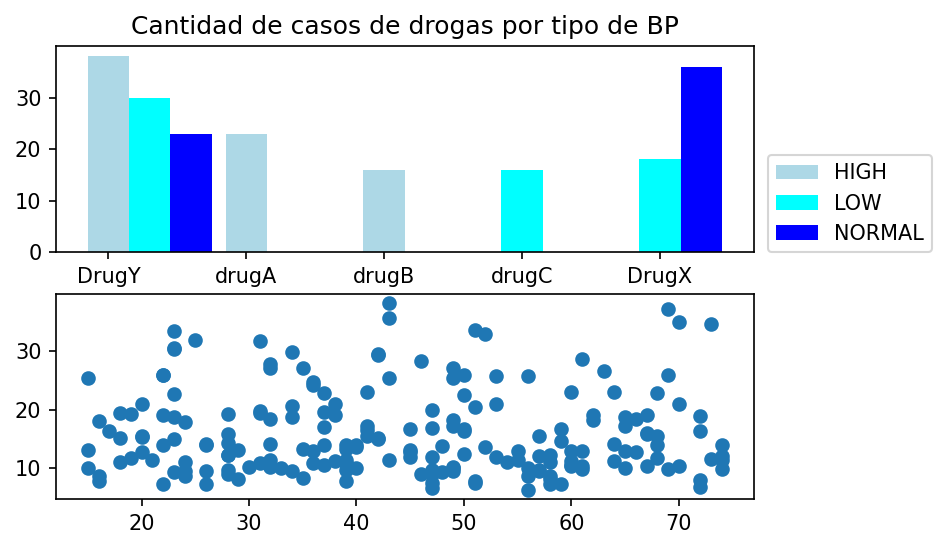

In [ ]:
#1
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(2,1,1)

sep = 0.3

#barras - parametro 1: valores de x; parametro 2: valores en y; parametro 3: ancho de barra.
#print(x, ya, yb)
ax1.bar([0,1,2], bphigh.values,sep, color='lightblue')
ax1.bar([0+sep,3,4], bplow.values,sep, color='cyan')
ax1.bar([0+sep+sep,4+sep], bpnormal.values,sep, color='blue')
ax1.set_title('Cantidad de casos de drogas por tipo de BP')
ax1.legend(['HIGH','LOW','NORMAL'],loc=(1.02,0))
ax1.set_xticklabels(["",'DrugY',"drugA","drugB","drugC","DrugX"])

ax2=fig1.add_subplot(2,1,2)
ax2.scatter(data_drogas['Age'].sort_values(),data_drogas['Na_to_K'])





plt.show()

In [ ]:
filtro_sex=data_drogas.groupby(['Sex','Drug'])[['Age']].count()

---
Cosas de la plataforma

# Revisando la libreria para trazar en mapas

In [ ]:
conda install folium 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - folium

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install folium

     |████████████████████████████████| 95 kB 3.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium as fl

In [ ]:
map = fl.Map(location = [-33.533510, -70.550686])
map

In [ ]:
fl.Marker(location=[-33.533510, -70.550686],popup='Casa del Maty').add_to(map) 
map

---
# usando plotly

In [ ]:
pip install plotly.express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

for more information
https://plotly.com/
